# Read in 

In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab 

In [420]:
pylab.rcParams['figure.figsize'] = 8, 6
%matplotlib inline

In [423]:
df = pd.read_csv('./data/data_cleaned/national_level_aggragated_data_from_1992.csv')

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 21 columns):
year                            24 non-null int64
enroll                          24 non-null float64
total_revenue                   24 non-null int64
federal_revenue                 24 non-null int64
state_revenue                   24 non-null int64
local_revenue                   24 non-null int64
total_expenditure               24 non-null int64
instruction_expenditure         24 non-null int64
support_services_expenditure    24 non-null int64
other_expenditure               24 non-null float64
capital_outlay_expenditure      24 non-null int64
total_known_expenditure         24 non-null float64
unknown_expenditure             24 non-null float64
rev_per_enroll                  24 non-null float64
population                      24 non-null float64
known_property_crimes           24 non-null float64
expenditure_per_pupil           24 non-null float64
gdp_per_capita                 

In [425]:
df.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,total_known_expenditure,unknown_expenditure,rev_per_enroll,population,known_property_crimes,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
0,1992,4.333655e+07,233210984,15148508,106504038,111558438,237333143,125154024,69877598,1.224317e+07,...,2.279302e+08,9.402954e+06,309.534571,255043081.0,11990945.0,5405.156863,51028.582671,20346.450980,0.068508,87.785417
1,1993,4.090477e+07,243206654,15739744,112674291,114792619,244202408,129561976,72413365,1.265997e+07,...,2.355261e+08,8.676278e+06,299.721536,257801551.0,11380141.0,5574.288984,45306.938209,21031.686275,0.063103,89.128417
2,1994,4.087058e+07,250750573,16688390,113508868,120553315,252664869,133930062,75321616,1.340875e+07,...,2.432721e+08,9.392817e+06,309.507339,260351278.0,11293856.0,5766.668378,41983.998664,21907.294118,0.056176,88.956917
3,1995,4.380762e+07,279277709,18085196,130307103,130885410,281831835,149485905,82430356,1.506156e+07,...,2.712819e+08,1.054992e+07,322.772530,262832520.0,11082236.0,5977.548171,40542.293672,22828.156863,0.052446,86.511833
4,1996,4.457046e+07,292952786,18604617,139602106,134746063,297740499,156920519,85717821,1.547932e+07,...,2.858893e+08,1.185118e+07,332.075643,265262676.0,10414922.0,6134.923587,40464.352867,23958.137255,0.051431,88.515667


In [426]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'expenditure_per_pupil', 'gdp_per_capita',
       'income_per_capita', 'unemployment_rate', 'dollar_index'],
      dtype='object')

Normalize currency related values to dollar index

In [427]:
currency_related = ['total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll',
       'expenditure_per_pupil', 'gdp_per_capita',
       'income_per_capita']

In [428]:
df[currency_related] = df[currency_related].apply(lambda x: x / df.dollar_index)

# Stats on raw values

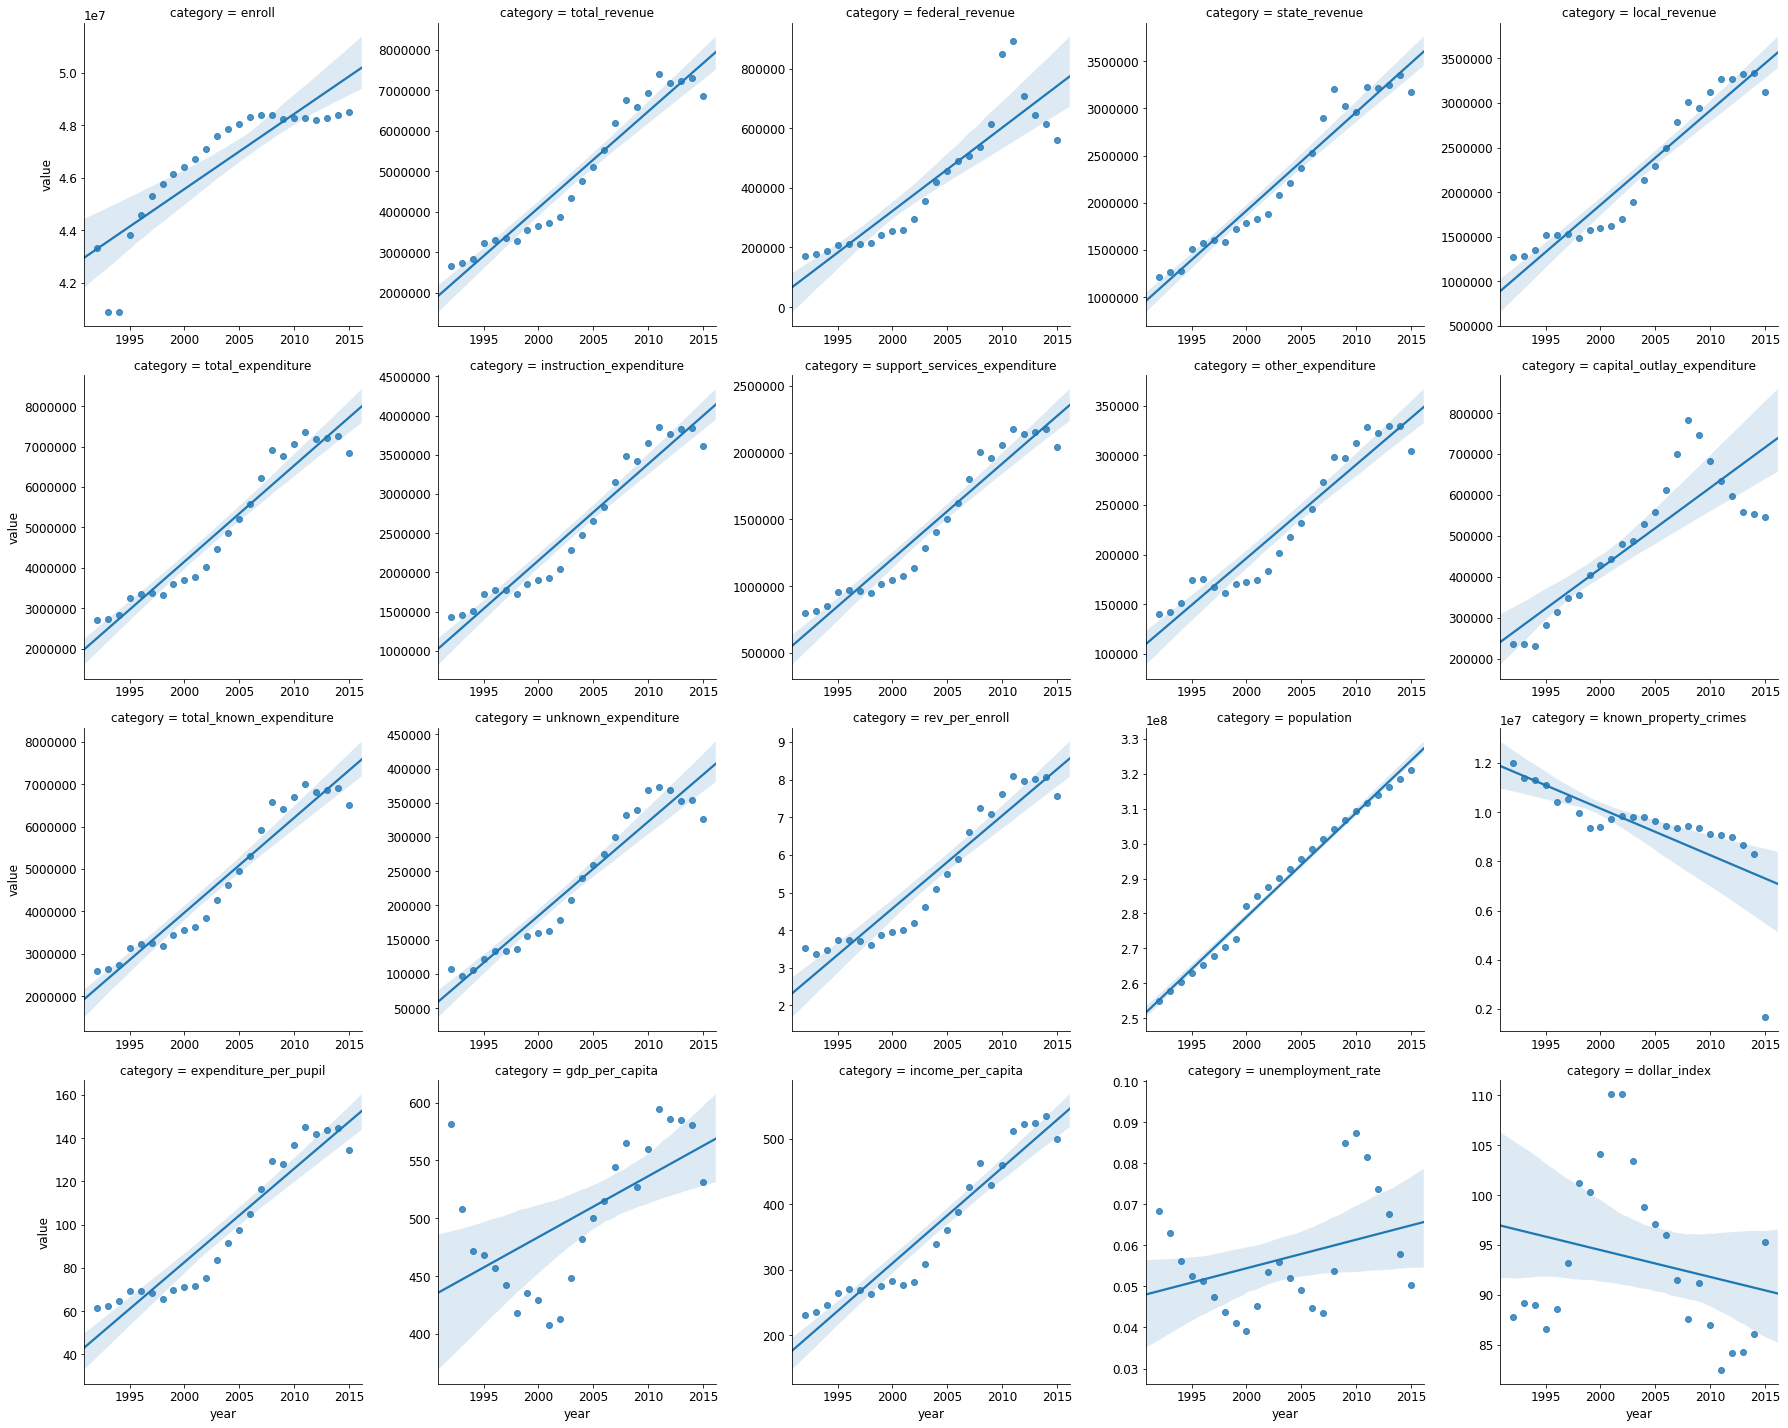

In [429]:
plt.rcParams['font.size'] = 12
sns.lmplot(data = df.melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = df.columns[1:]),
           x = 'year',
           y = 'value',
           col = 'category',
           col_wrap = 5,
           sharex = False,
           sharey = False)

In [430]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'expenditure_per_pupil', 'gdp_per_capita',
       'income_per_capita', 'unemployment_rate', 'dollar_index'],
      dtype='object')

## National level revenue expenditure subcategory correlation

In [431]:
category_expenditures = ['instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure']
category_revenues = ['federal_revenue', 'state_revenue',
       'local_revenue']

corr_category = df.corr()

corr_category.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,total_known_expenditure,unknown_expenditure,rev_per_enroll,population,known_property_crimes,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
year,1.000000,0.866766,0.968033,0.896956,0.975190,0.962215,0.967502,0.968575,0.966112,0.957392,...,0.967576,0.962709,0.953417,0.995776,-0.707453,0.951313,0.593815,0.959501,0.357079,-0.235758
enroll,0.866766,1.000000,0.805768,0.740495,0.833988,0.781000,0.815468,0.797315,0.794996,0.774232,...,0.814488,0.828311,0.756930,0.883318,-0.565578,0.746931,0.323093,0.754481,0.120381,0.085784
total_revenue,0.968033,0.805768,1.000000,0.951959,0.995437,0.998427,0.999401,0.999385,0.999598,0.996850,...,0.999473,0.994529,0.995499,0.961917,-0.583678,0.994578,0.736608,0.989430,0.485530,-0.431778
federal_revenue,0.896956,0.740495,0.951959,1.000000,0.924031,0.946829,0.952720,0.953060,0.950883,0.951137,...,0.951767,0.964622,0.952180,0.895685,-0.465889,0.953099,0.733397,0.927997,0.639215,-0.458719
state_revenue,0.975190,0.833988,0.995437,0.924031,1.000000,0.991699,0.995613,0.993401,0.994201,0.988762,...,0.995878,0.987622,0.985432,0.970769,-0.607364,0.983655,0.698512,0.983256,0.422213,-0.378422


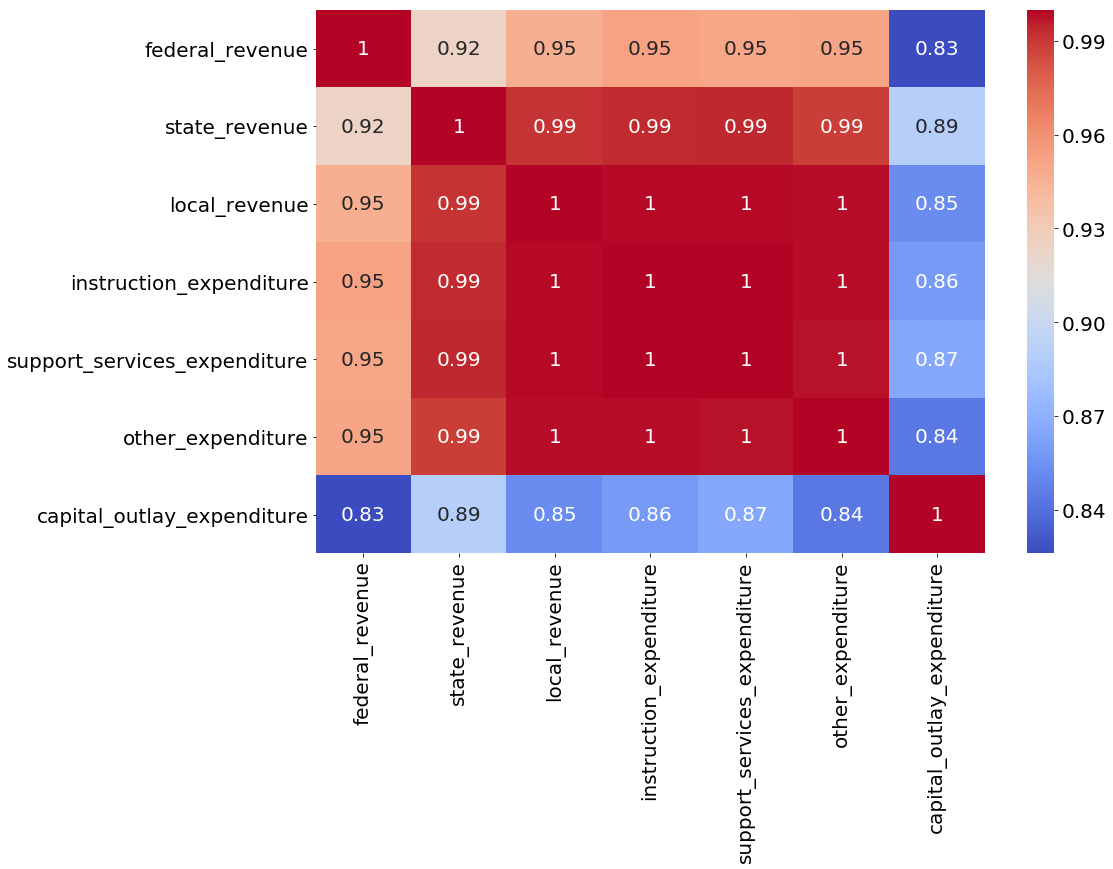

In [432]:
plt.figure(figsize = (15, 10))
plt.rcParams['font.size'] = 20
#sns.heatmap(corr_category.loc[category_revenues, category_expenditures], annot = True)
sns.heatmap(corr_category.loc[category_revenues + category_expenditures, category_revenues + category_expenditures], cmap = 'coolwarm',annot = True)

## National level income outcome correlation

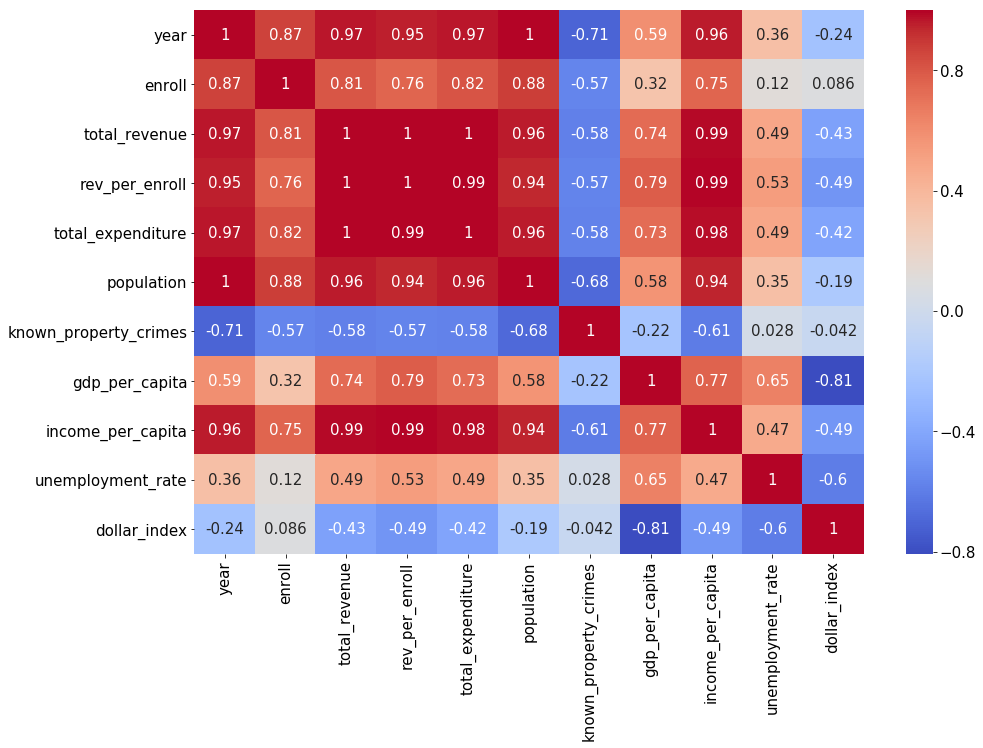

In [433]:
plt.rcParams['font.size'] = 15
covs = df[['year', 'enroll', 'total_revenue', 'rev_per_enroll', 'total_expenditure','population',
        'known_property_crimes',  'gdp_per_capita', 'income_per_capita', 'unemployment_rate', 
        'dollar_index']].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(covs, cmap = 'coolwarm', annot=True)

## Revenue subcategory on 2015

In [434]:
category_revenues

['federal_revenue', 'state_revenue', 'local_revenue']

In [435]:

data  = df[['year'] + category_revenues].melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = category_revenues)


In [436]:
data[data.year == 2015]

,year,category,value
23,2015,federal_revenue,5.592150e+05
47,2015,state_revenue,3.174768e+06
71,2015,local_revenue,3.123345e+06


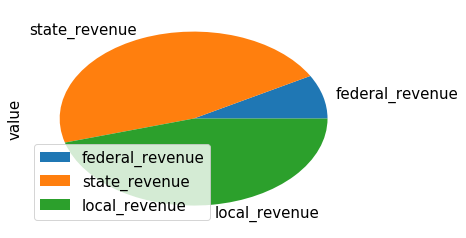

In [437]:
data[data.year == 2015].plot(kind = 'pie', y = 'value', labels = category_revenues)

# Change rate analysis

In [438]:
df_change = df.copy()
df_change[df.columns[1:]] = df_change[df.columns[1:]].pct_change()

df_change.columns = ['year'] + list(df_change.columns[1:] + '_pct_change')

category_revenues_change = [x + '_pct_change' for x in category_revenues]
category_expenditures_change = [x + '_pct_change' for x in category_expenditures]

## change rate revenues 

<Figure size 432x288 with 0 Axes>

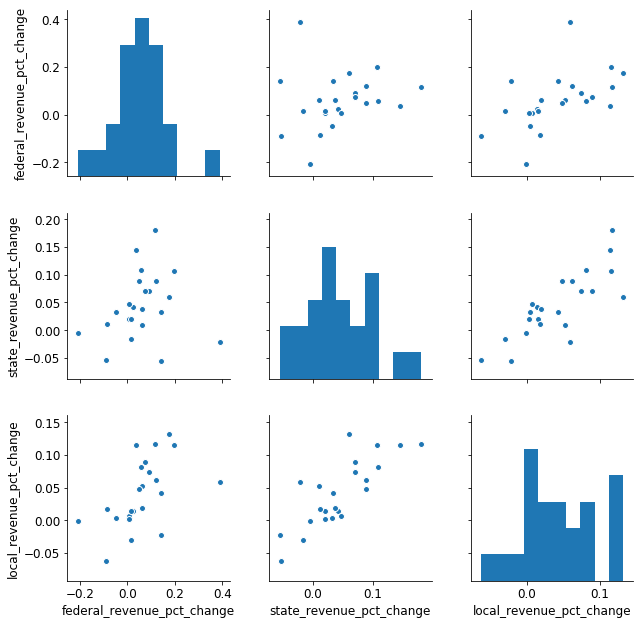

In [439]:
plt.figure()
plt.rcParams['font.size'] = 12
sns.pairplot(df_change[category_revenues_change][1:], size=3)

## change rate expenditures

<Figure size 432x288 with 0 Axes>

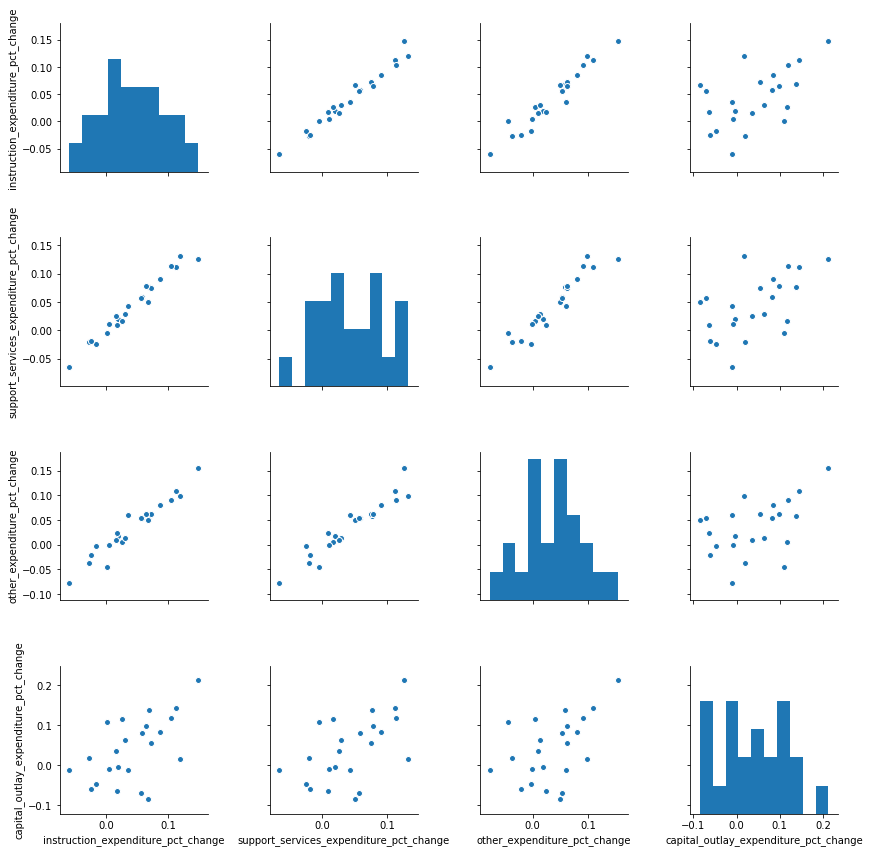

In [440]:
plt.figure()
plt.rcParams['font.size'] = 10
sns.pairplot(df_change[category_expenditures_change][1:], size=3)

## Change rate income outcomes

<Figure size 432x288 with 0 Axes>

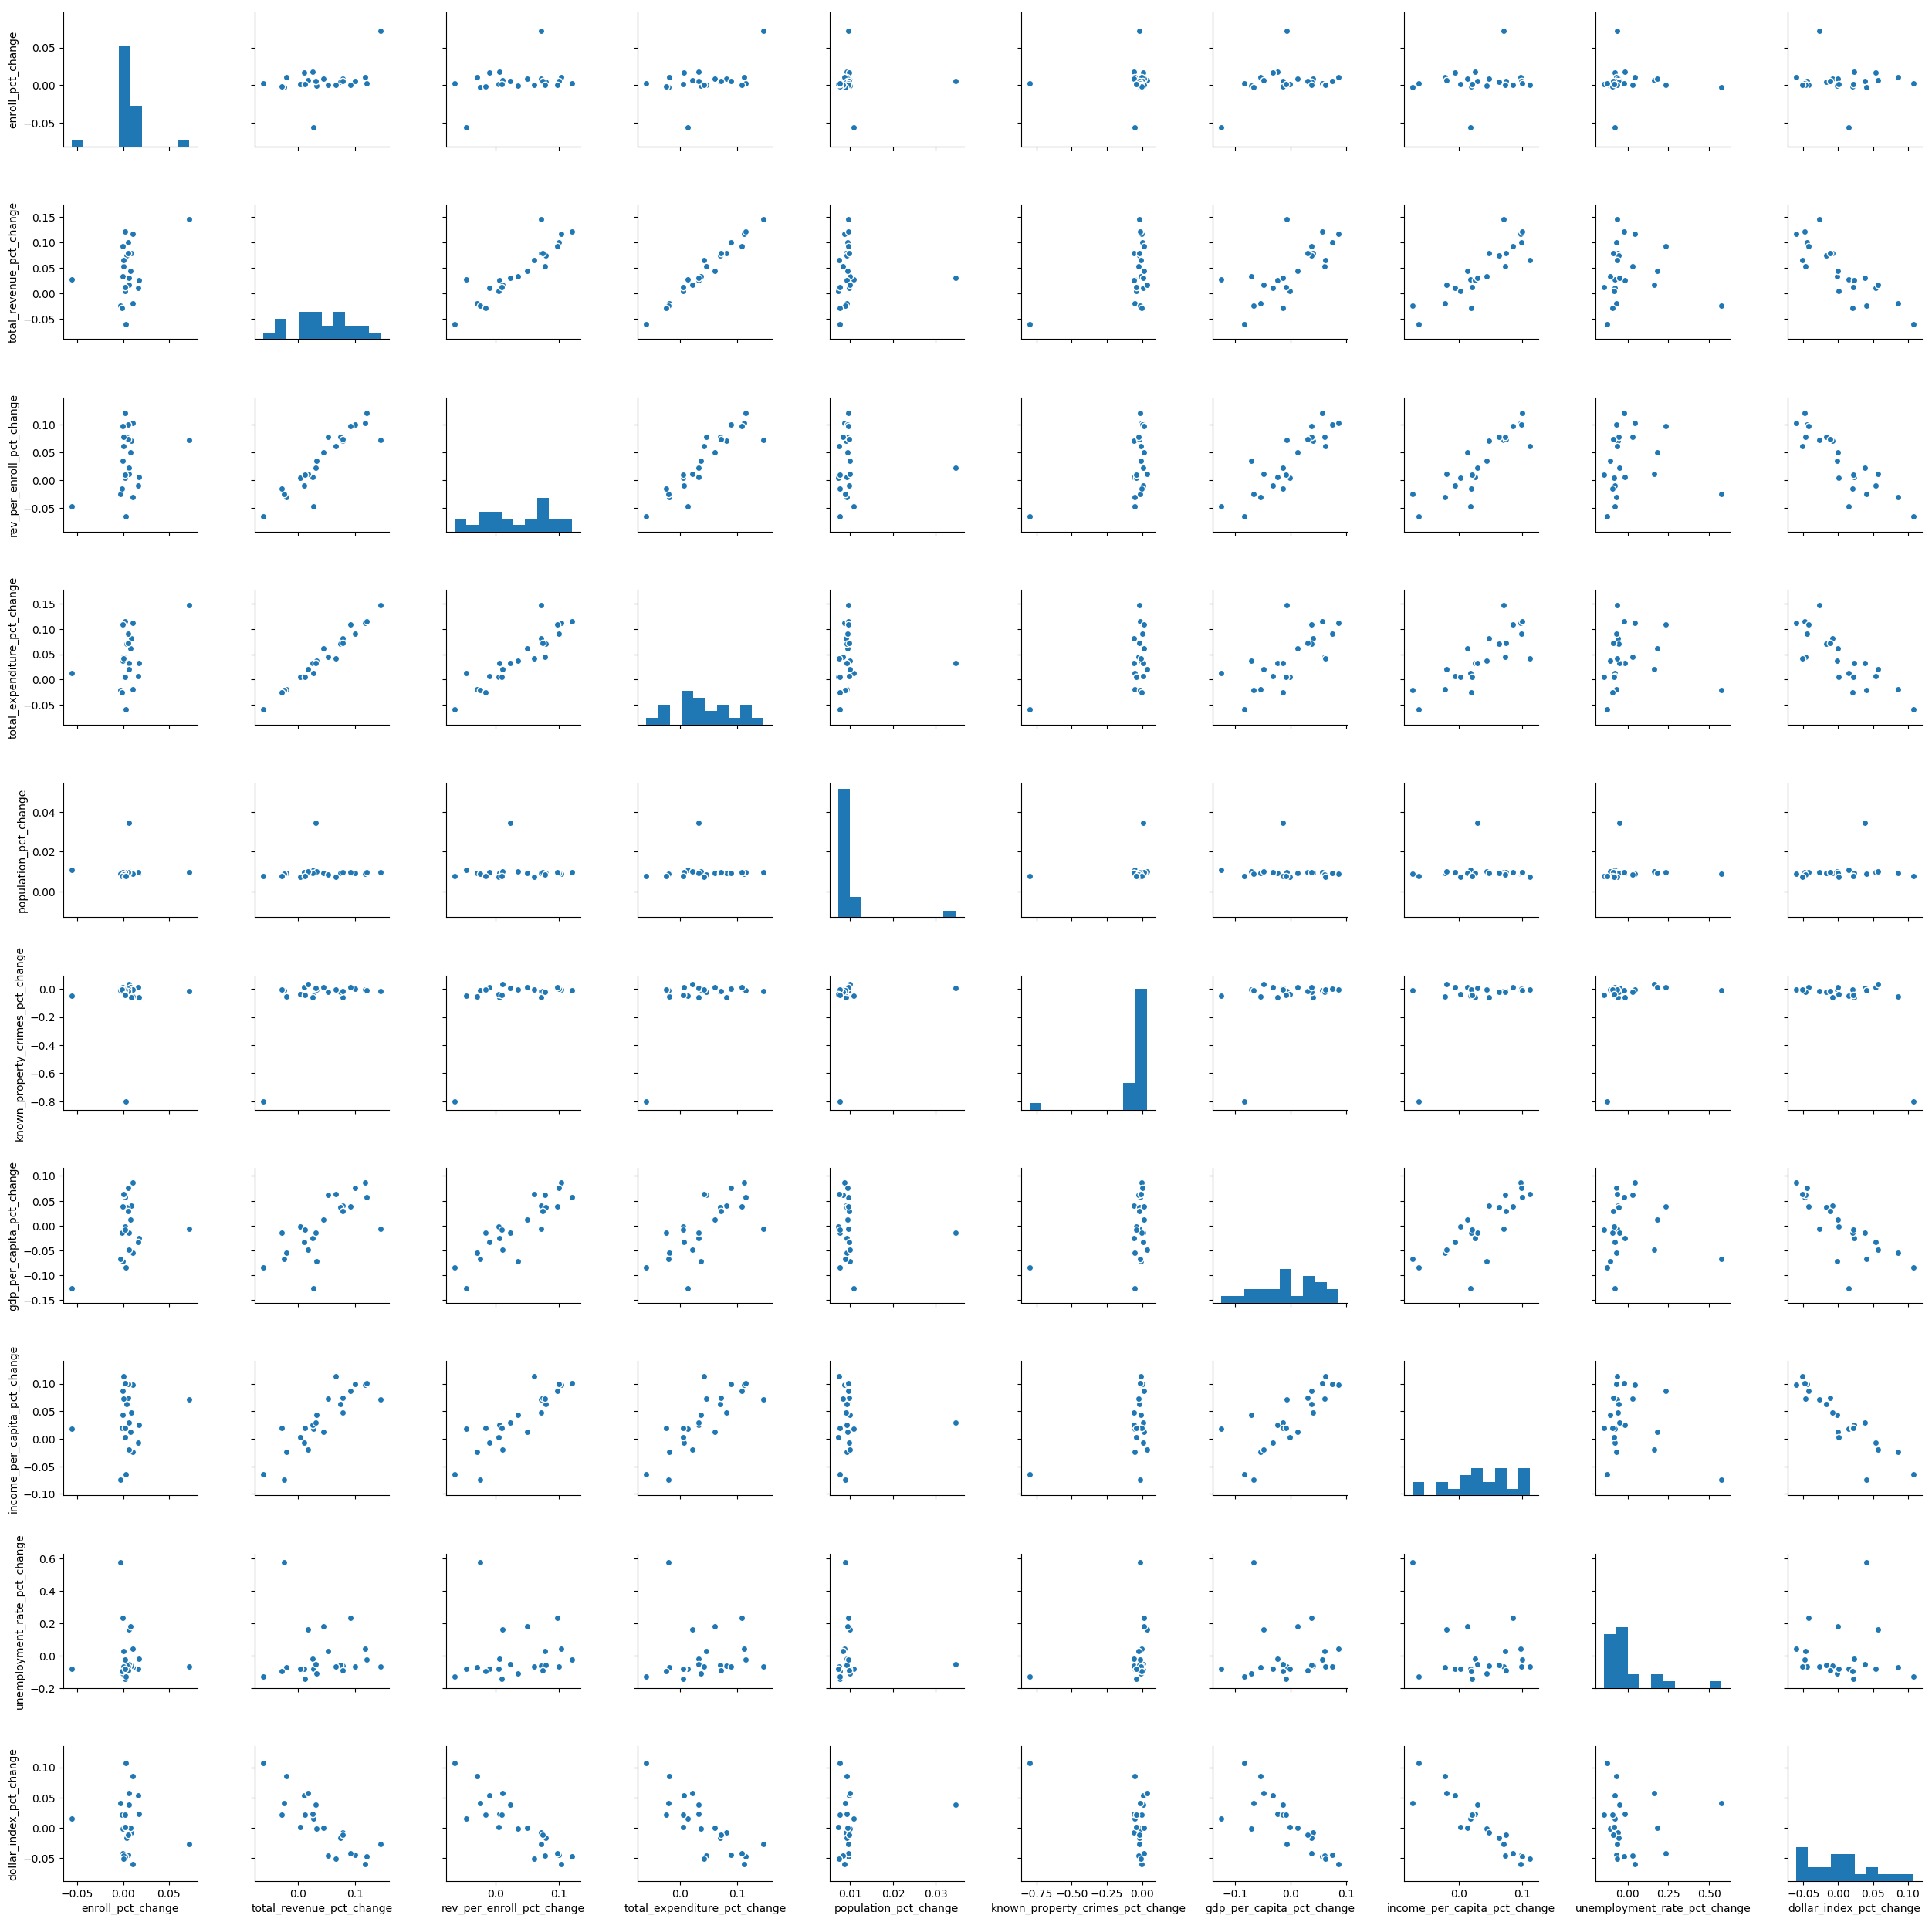

In [441]:
plt.figure()
plt.rcdefaults()
sns.pairplot(df_change[[x + '_pct_change' for x in ['enroll', 'total_revenue', 'rev_per_enroll', 'total_expenditure','population',
        'known_property_crimes',  'gdp_per_capita', 'income_per_capita', 'unemployment_rate', 
        'dollar_index']]][1:])


In [442]:
df_change.head()

,year,enroll_pct_change,total_revenue_pct_change,federal_revenue_pct_change,state_revenue_pct_change,local_revenue_pct_change,total_expenditure_pct_change,instruction_expenditure_pct_change,support_services_expenditure_pct_change,other_expenditure_pct_change,...,total_known_expenditure_pct_change,unknown_expenditure_pct_change,rev_per_enroll_pct_change,population_pct_change,known_property_crimes_pct_change,expenditure_per_pupil_pct_change,gdp_per_capita_pct_change,income_per_capita_pct_change,unemployment_rate_pct_change,dollar_index_pct_change
0,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,-0.056114,0.027147,0.023373,0.041993,0.013486,0.013439,0.019621,0.020674,0.018463,...,0.017755,-0.091185,-0.046293,0.010816,-0.050939,0.015751,-0.125505,0.018103,-0.078899,0.015299
2,1994,-0.000836,0.033006,0.062315,0.009349,0.052208,0.036648,0.035707,0.042167,0.061187,...,0.034879,0.084673,0.034640,0.009890,-0.007582,0.036506,-0.071556,0.043641,-0.109765,-0.001924
3,1995,0.071862,0.145245,0.114328,0.180436,0.116391,0.146963,0.147695,0.125309,0.155010,...,0.146655,0.154935,0.072333,0.009530,-0.018738,0.065865,-0.007047,0.071486,-0.066405,-0.027486
4,1996,0.017413,0.025219,0.005432,0.047079,0.006191,0.032531,0.025970,0.016341,0.004471,...,0.029989,0.097912,0.005532,0.009246,-0.060215,0.003094,-0.024517,0.025741,-0.019348,0.023163


In [443]:
df_change.columns

Index(['year', 'enroll_pct_change', 'total_revenue_pct_change',
       'federal_revenue_pct_change', 'state_revenue_pct_change',
       'local_revenue_pct_change', 'total_expenditure_pct_change',
       'instruction_expenditure_pct_change',
       'support_services_expenditure_pct_change',
       'other_expenditure_pct_change', 'capital_outlay_expenditure_pct_change',
       'total_known_expenditure_pct_change', 'unknown_expenditure_pct_change',
       'rev_per_enroll_pct_change', 'population_pct_change',
       'known_property_crimes_pct_change', 'expenditure_per_pupil_pct_change',
       'gdp_per_capita_pct_change', 'income_per_capita_pct_change',
       'unemployment_rate_pct_change', 'dollar_index_pct_change'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

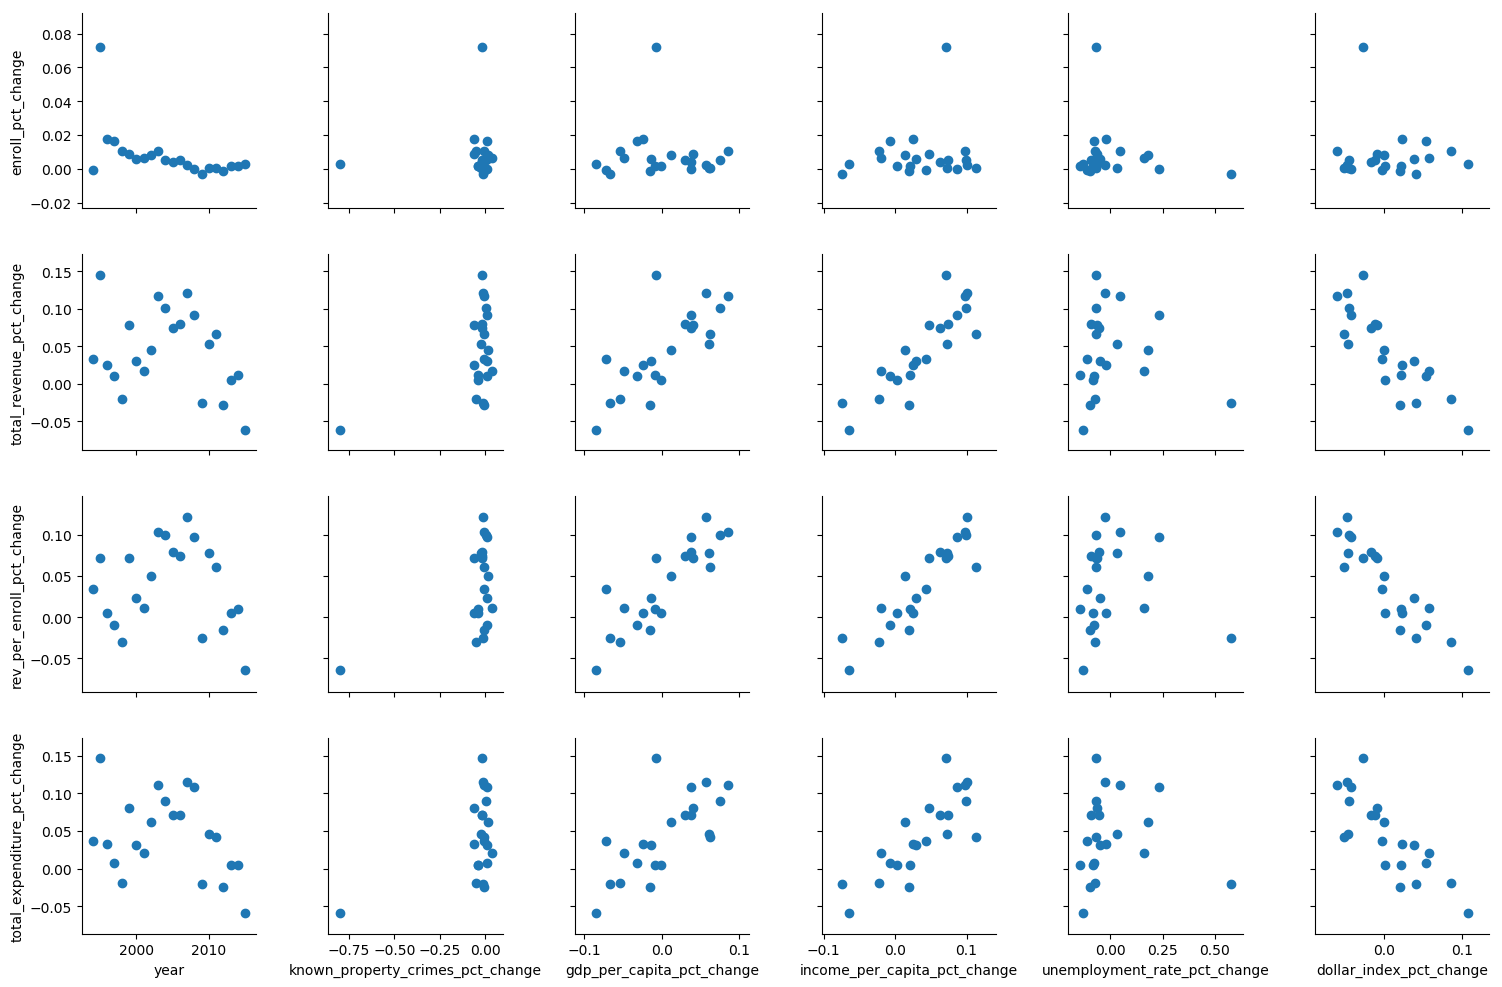

In [444]:
plt.figure()
plt.rcdefaults()
f = sns.PairGrid(data = df_change[2:], 
            x_vars = ['year', 'known_property_crimes_pct_change', 'gdp_per_capita_pct_change',
                     'income_per_capita_pct_change', 'unemployment_rate_pct_change','dollar_index_pct_change'],
            y_vars = ['enroll_pct_change', 'total_revenue_pct_change', 'rev_per_enroll_pct_change', 'total_expenditure_pct_change'])
f.map(plt.scatter)


## conclusion

Following factors are linearly changing with gdp_per_capita_pct_change:
+ 'total_revenue_pct_change'
+ 'rev_per_enroll_pct_change'
+ 'total_expenditure_pct_change'  
Lets perform a linear regression

In [445]:
from sklearn.ensemble import RandomForestRegressor

In [446]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [447]:
selec_feature = ['gdp_per_capita_pct_change', 'unemployment_rate_pct_change', 'enroll_pct_change', 'dollar_index_pct_change']
X = df_change[selec_feature][1:]
y = df_change.total_revenue_pct_change[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

0.9114786181619516
{'gdp_per_capita_pct_change': 0.22490932323221066, 'unemployment_rate_pct_change': 0.04502392838888877, 'enroll_pct_change': 0.08223675289029647, 'dollar_index_pct_change': 0.6478299954886042}


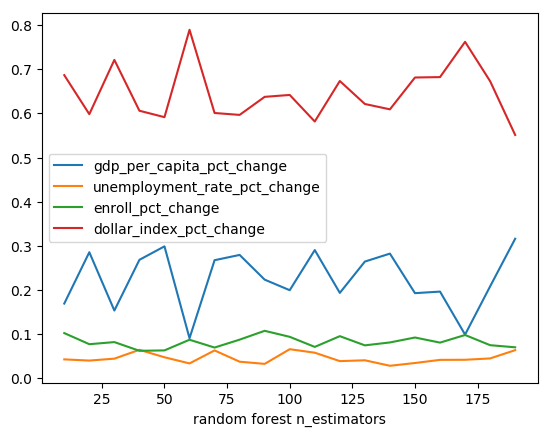

In [448]:
feature_score = []
estimators = np.arange(10, 200, 10)
for n in estimators:
    tree = RandomForestRegressor(n_estimators=40).fit(X,y)
    feature_score.append(tree.feature_importances_)

print(tree.score(X,y))
print(dict(zip(selec_feature, [x.mean() for x in np.array(feature_score).T])))
plt.plot(estimators, feature_score)
plt.xlabel('random forest n_estimators')
plt.legend(selec_feature)


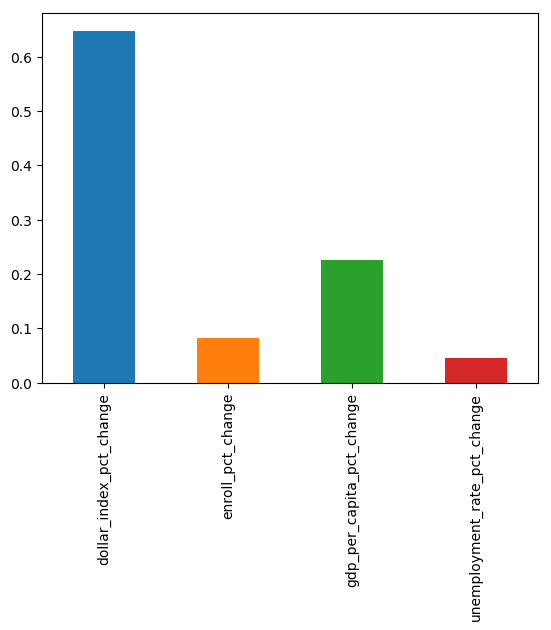

In [449]:
pd.Series(dict(zip(selec_feature, [x.mean() for x in np.array(feature_score).T]))).plot(kind= 'bar')

## Linear regression on selected features

In [450]:
selec_main_feature = ['gdp_per_capita_pct_change', 'dollar_index_pct_change']
#selec_main_feature = selec_feature
selec_X = df_change[selec_main_feature][1:]
lg = LinearRegression()
lg.fit(selec_X,y).score(selec_X,y)

0.7160675106176586

In [451]:
lg.coef_, lg.intercept_

(array([ 0.08452938, -0.90158376]), 0.047676743363031425)

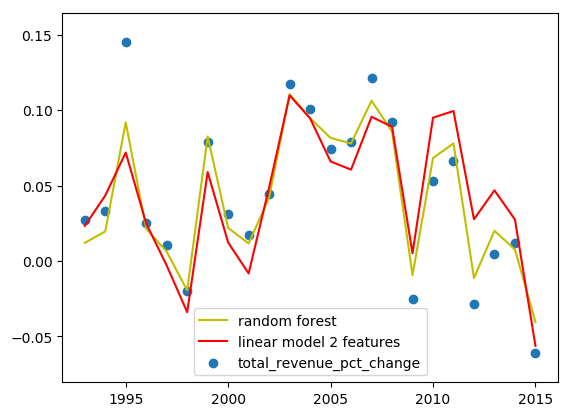

In [452]:
tselec_X = np.linspace(1992,2015, 20)
plt.scatter(df_change.year[1:], y)
plt.plot(df_change.year[1:], tree.predict(X), 'y-', label = 'random forest')
plt.plot(df_change.year, 0.0477 + 0.085 * df_change.gdp_per_capita_pct_change - 0.9 * df_change.dollar_index_pct_change, 'r-', label = 'linear model 2 features')
plt.legend()

In [453]:
X_train, X_test, y_train, y_test = train_test_split(selec_X, y, test_size = 0.2, random_state = 10)

In [454]:
lg = LinearRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.5460908436740601

In [455]:
print(lg.predict(X_test),'\n', y_test.values)

[-0.03571108  0.03215225  0.00879995  0.06275305  0.08955384] 
 [-0.02017524  0.03300626  0.0310202   0.14524537  0.10036746]


In [456]:

from sklearn.metrics import mean_squared_error, r2_score

In [457]:
r2_score(y_test, lg.predict(X_test))

0.5460908436740601

In [458]:
mean_squared_error(y_test, lg.predict(X_test))

0.0015315498016985228

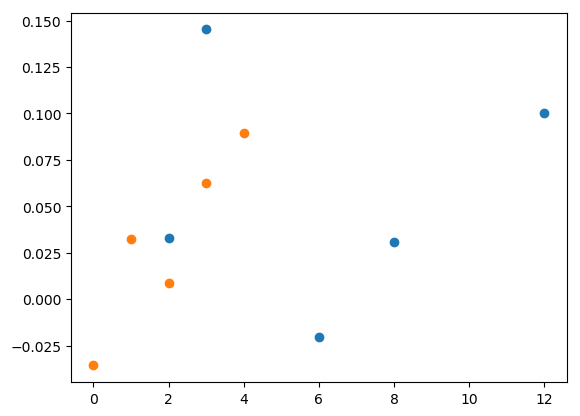

In [459]:
plt.plot( y_test, 'o')
plt.plot(lg.predict(X_test),'o')

## change rate plot VS year

In [464]:
df_change.head()

,year,enroll_pct_change,total_revenue_pct_change,federal_revenue_pct_change,state_revenue_pct_change,local_revenue_pct_change,total_expenditure_pct_change,instruction_expenditure_pct_change,support_services_expenditure_pct_change,other_expenditure_pct_change,...,total_known_expenditure_pct_change,unknown_expenditure_pct_change,rev_per_enroll_pct_change,population_pct_change,known_property_crimes_pct_change,expenditure_per_pupil_pct_change,gdp_per_capita_pct_change,income_per_capita_pct_change,unemployment_rate_pct_change,dollar_index_pct_change
0,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,-0.056114,0.027147,0.023373,0.041993,0.013486,0.013439,0.019621,0.020674,0.018463,...,0.017755,-0.091185,-0.046293,0.010816,-0.050939,0.015751,-0.125505,0.018103,-0.078899,0.015299
2,1994,-0.000836,0.033006,0.062315,0.009349,0.052208,0.036648,0.035707,0.042167,0.061187,...,0.034879,0.084673,0.034640,0.009890,-0.007582,0.036506,-0.071556,0.043641,-0.109765,-0.001924
3,1995,0.071862,0.145245,0.114328,0.180436,0.116391,0.146963,0.147695,0.125309,0.155010,...,0.146655,0.154935,0.072333,0.009530,-0.018738,0.065865,-0.007047,0.071486,-0.066405,-0.027486
4,1996,0.017413,0.025219,0.005432,0.047079,0.006191,0.032531,0.025970,0.016341,0.004471,...,0.029989,0.097912,0.005532,0.009246,-0.060215,0.003094,-0.024517,0.025741,-0.019348,0.023163


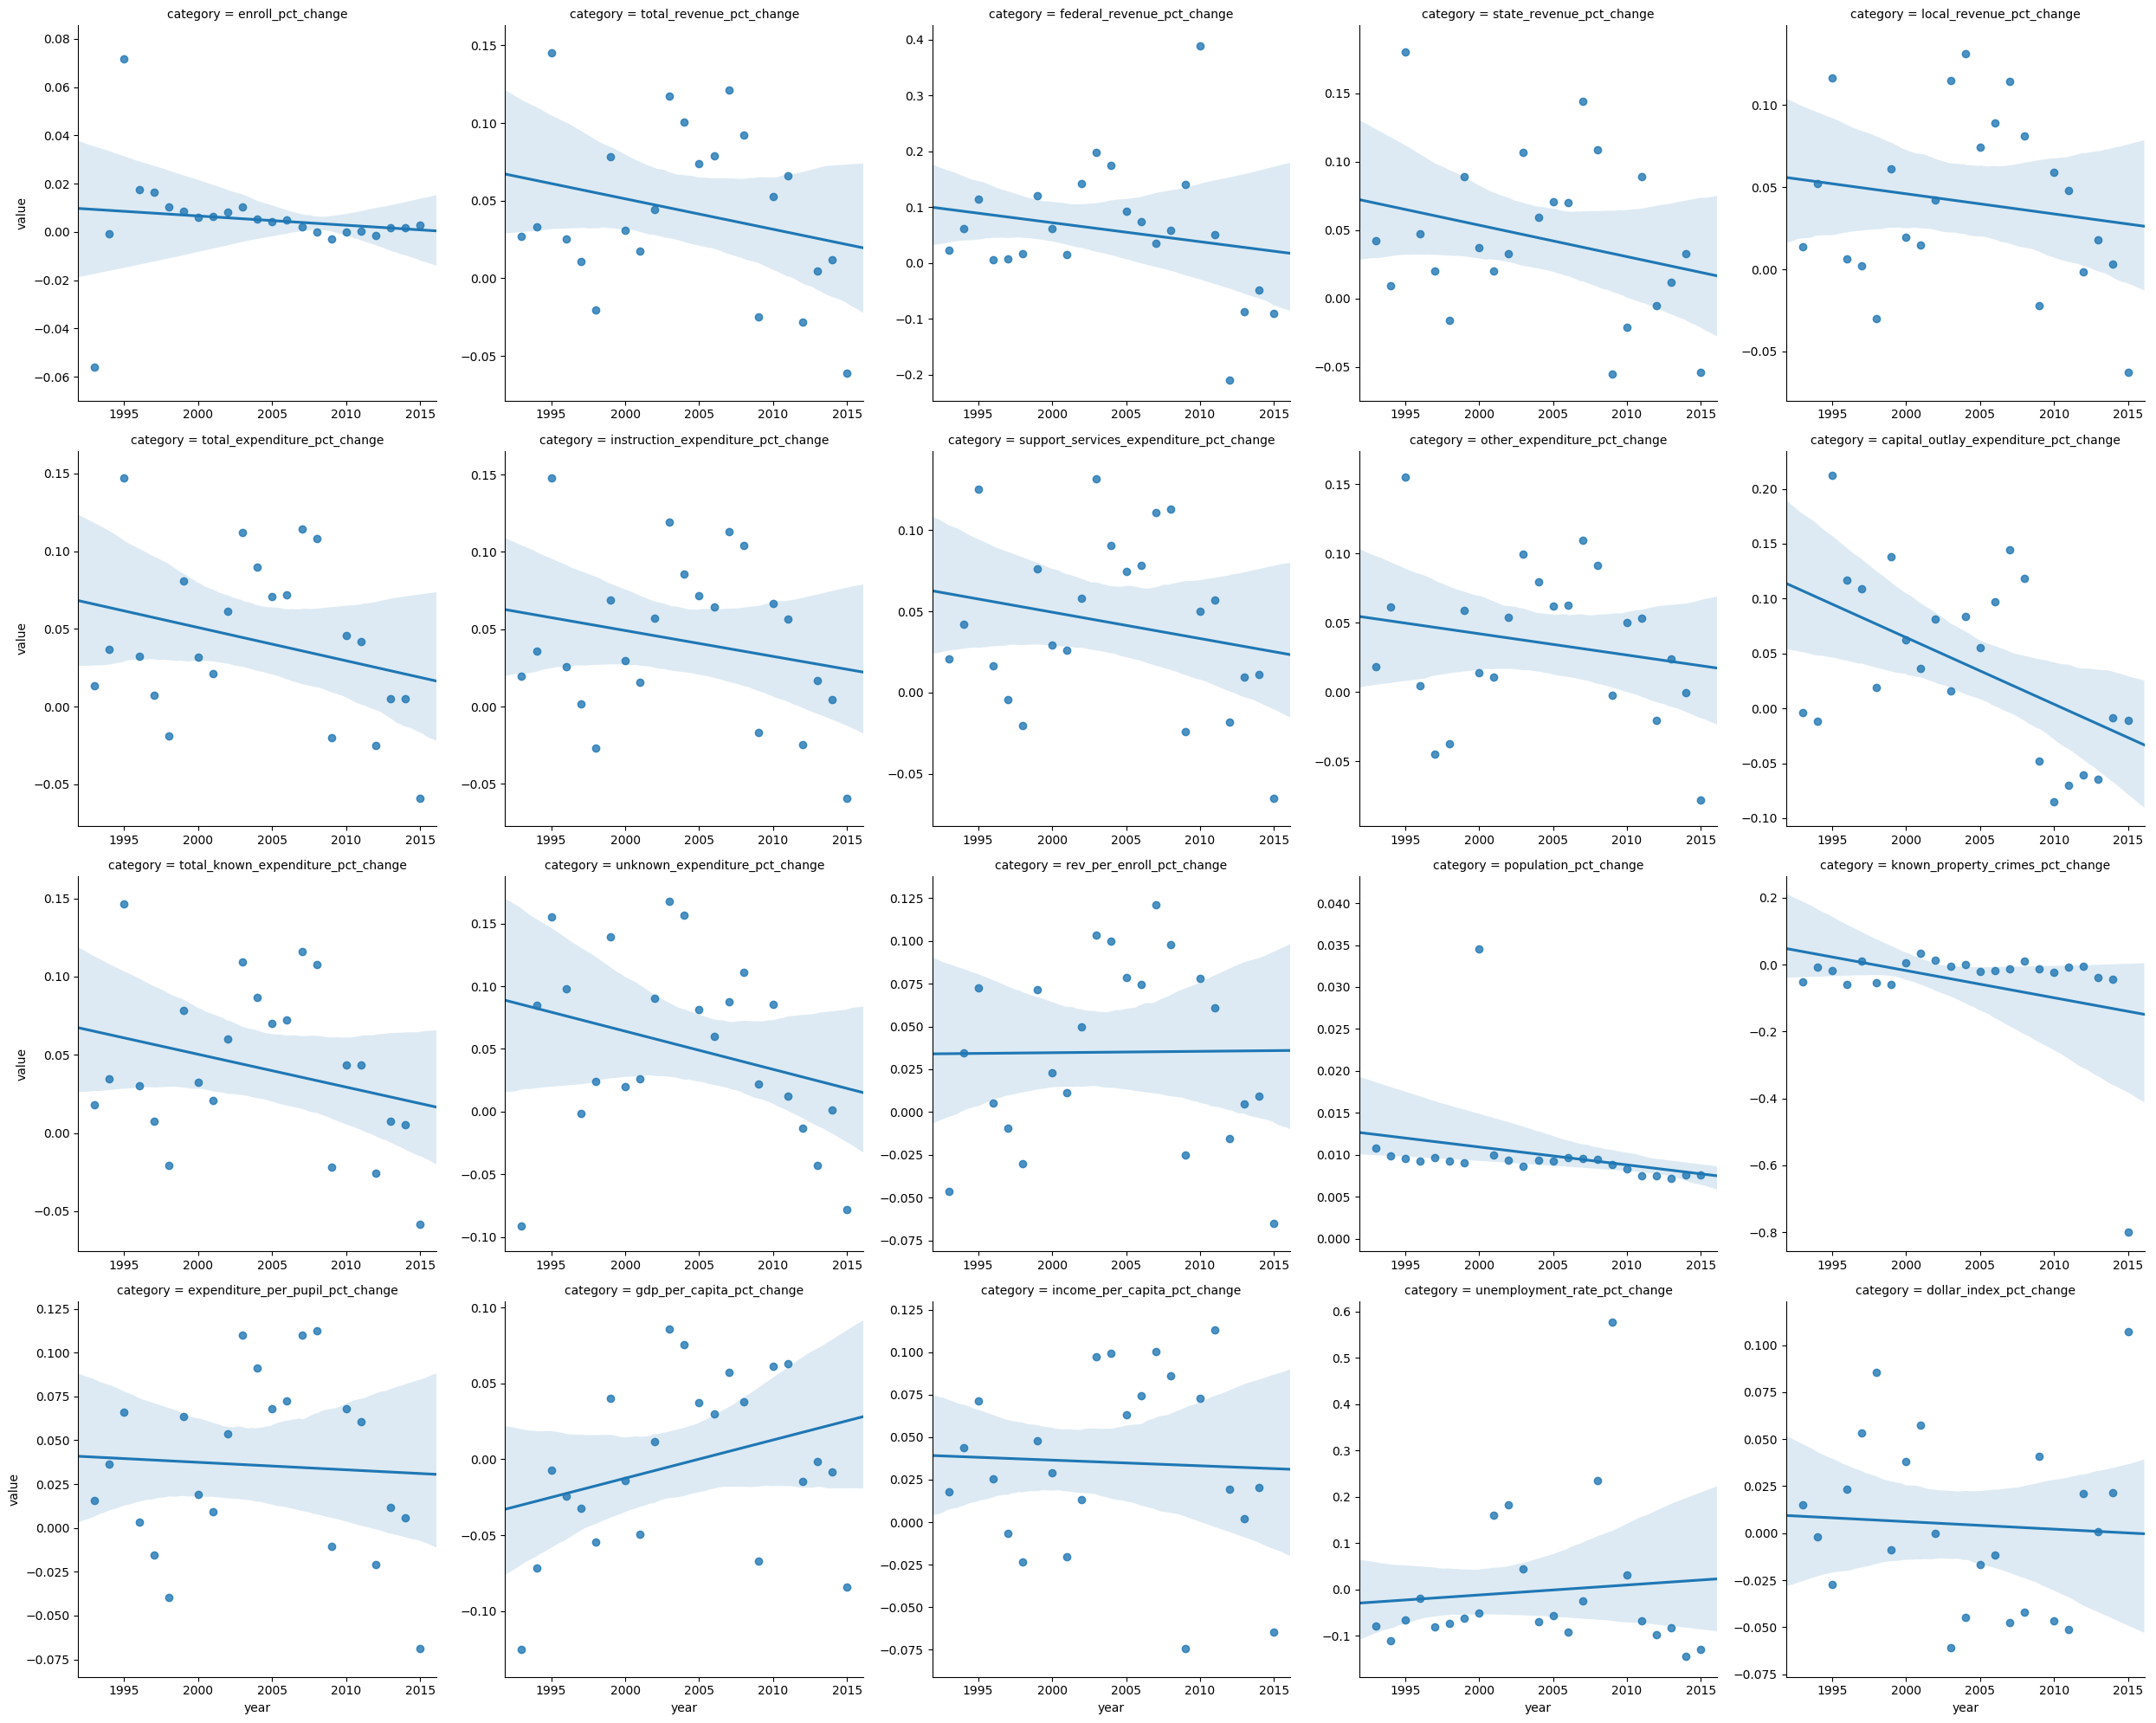

In [469]:
#plt.figure(figsize = (10, 8))
sns.lmplot(data = df_change.melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = list(df_change.columns)[1:]),
           x = 'year',
           y = 'value',
           col = 'category',
           col_wrap = 5,
           sharex = False,
           sharey = False)

## Correlations on revenue and expenditure

In [472]:
category_expenditures = ['instruction_expenditure_pct_change',
       'support_services_expenditure_pct_change', 'other_expenditure_pct_change',
       'capital_outlay_expenditure_pct_change']

category_revenues = ['federal_revenue_pct_change', 'state_revenue_pct_change',
       'local_revenue_pct_change']

corr_category_change = df_change.corr()

corr_category_change.head()

,year,enroll_pct_change,total_revenue_pct_change,federal_revenue_pct_change,state_revenue_pct_change,local_revenue_pct_change,total_expenditure_pct_change,instruction_expenditure_pct_change,support_services_expenditure_pct_change,other_expenditure_pct_change,...,total_known_expenditure_pct_change,unknown_expenditure_pct_change,rev_per_enroll_pct_change,population_pct_change,known_property_crimes_pct_change,expenditure_per_pupil_pct_change,gdp_per_capita_pct_change,income_per_capita_pct_change,unemployment_rate_pct_change,dollar_index_pct_change
year,1.000000,-0.130102,-0.252119,-0.197324,-0.266079,-0.160859,-0.279728,-0.217933,-0.210400,-0.191499,...,-0.276270,-0.285311,0.010463,-0.267388,-0.333375,-0.058064,0.304363,-0.043734,0.091176,-0.060152
enroll_pct_change,-0.130102,1.000000,0.353639,0.121541,0.395637,0.284446,0.407419,0.373178,0.302594,0.333552,...,0.395664,0.542379,0.302382,-0.006940,0.044820,0.117584,0.286713,0.135325,-0.050920,-0.080439
total_revenue_pct_change,-0.252119,0.353639,1.000000,0.534045,0.906369,0.960240,0.985449,0.986409,0.982335,0.943682,...,0.986995,0.781727,0.907793,0.011318,0.444714,0.927095,0.701474,0.865713,-0.059062,-0.844416
federal_revenue_pct_change,-0.197324,0.121541,0.534045,1.000000,0.179599,0.528879,0.524852,0.567618,0.529475,0.518129,...,0.511105,0.621336,0.572432,0.055010,0.287072,0.585526,0.466375,0.402424,0.332350,-0.527326
state_revenue_pct_change,-0.266079,0.395637,0.906369,0.179599,1.000000,0.803241,0.896737,0.876699,0.876153,0.832044,...,0.905664,0.604480,0.737618,0.026316,0.366318,0.762066,0.548636,0.771910,-0.181491,-0.683993


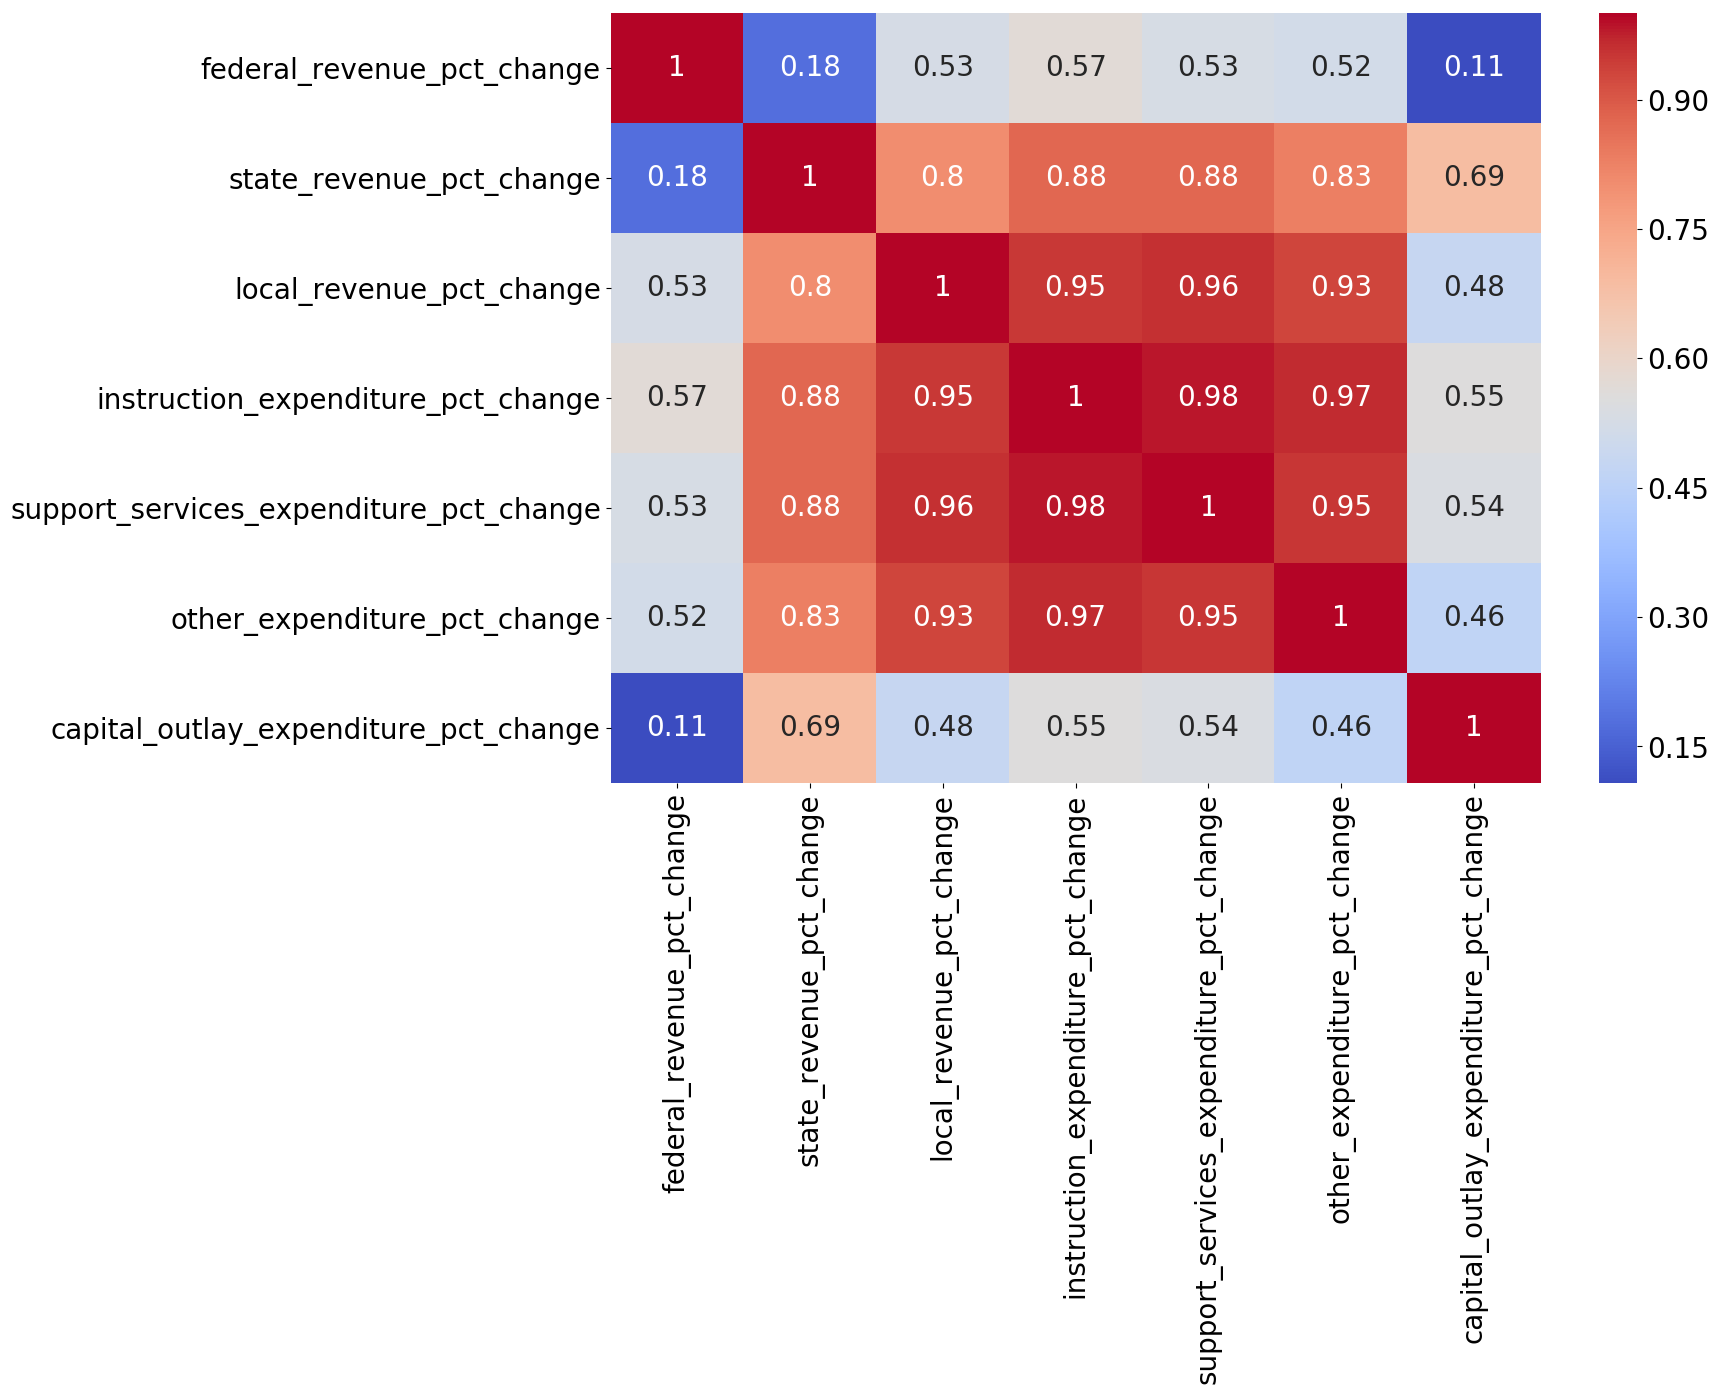

In [473]:
plt.figure(figsize = (15, 10))
plt.rcParams['font.size'] = 20
#sns.heatmap(corr_category.loc[category_revenues, category_expenditures], annot = True)
sns.heatmap(corr_category_change.loc[category_revenues + category_expenditures, category_revenues + category_expenditures], cmap = 'coolwarm',annot = True)

## correlations on income and outcomes

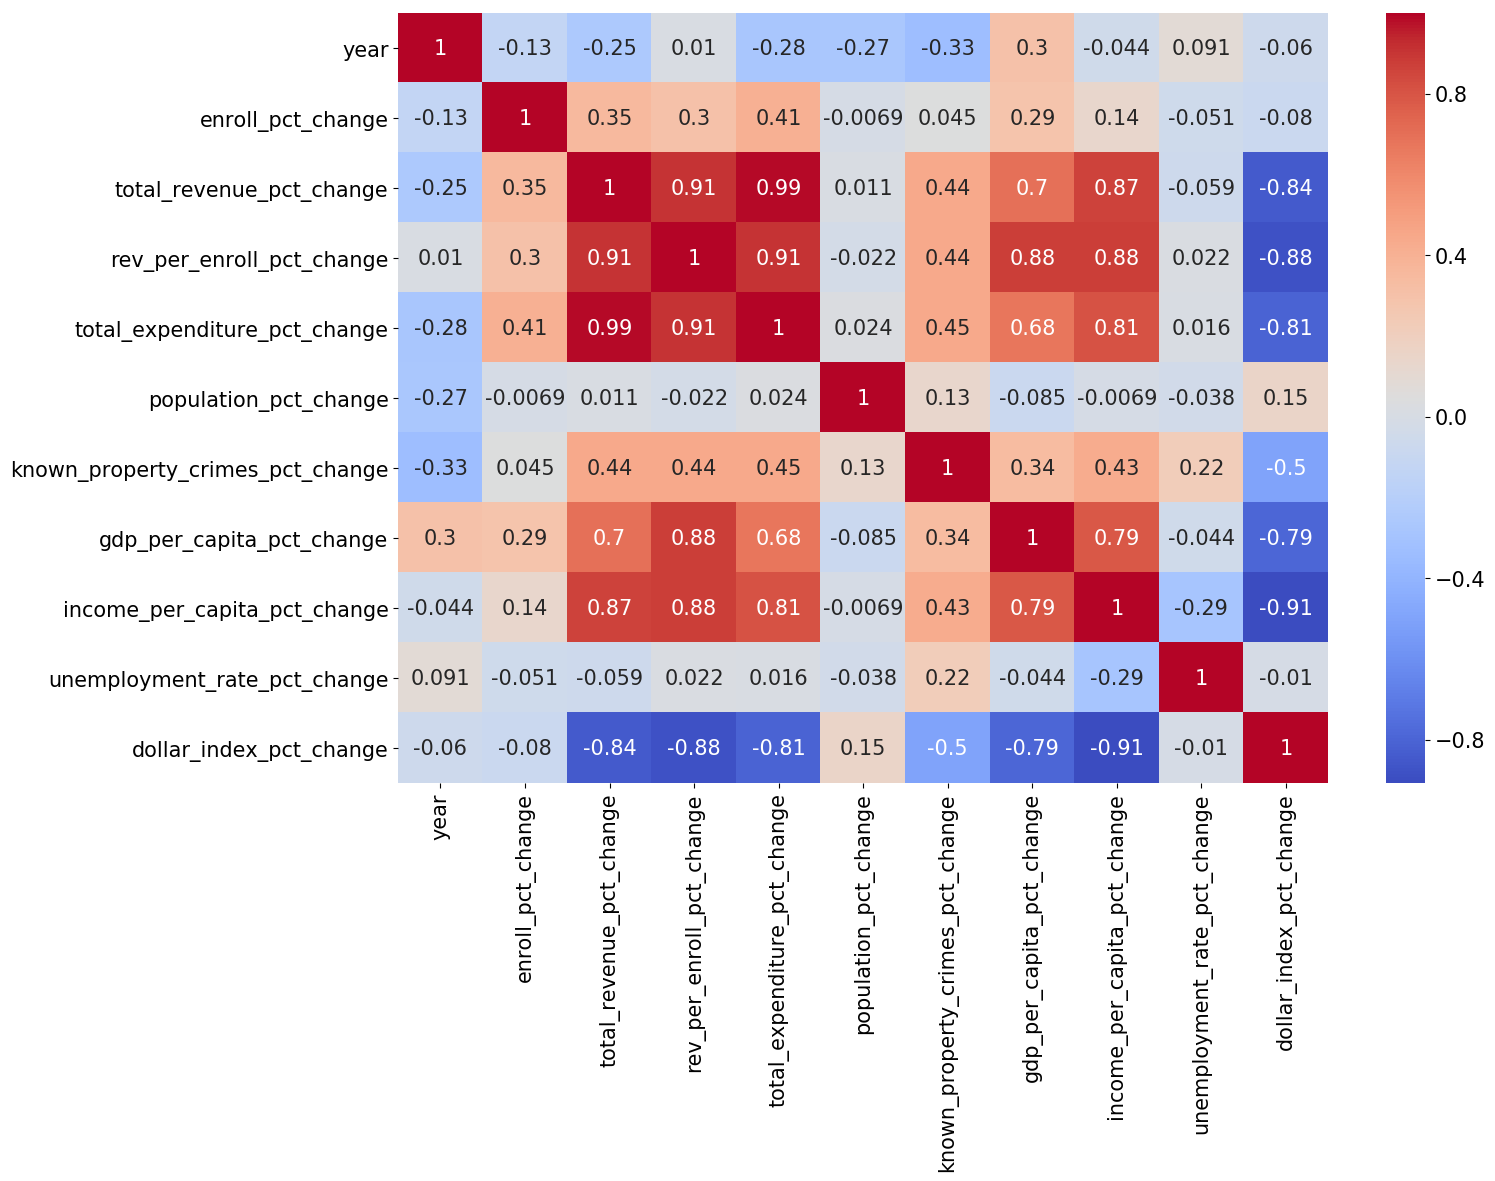

In [475]:
plt.rcParams['font.size'] = 15
covs_change = df_change[['year', 'enroll_pct_change', 'total_revenue_pct_change', 'rev_per_enroll_pct_change', 
                         'total_expenditure_pct_change','population_pct_change','known_property_crimes_pct_change',  
                         'gdp_per_capita_pct_change', 'income_per_capita_pct_change', 'unemployment_rate_pct_change', 
                         'dollar_index_pct_change']].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(covs_change, cmap = 'coolwarm', annot=True)